## 복습 4.

In [63]:
!pip install matplotlib

### 1. data 폴더 아래 위치한 train.csv 파일을 읽어온 뒤, 컬럼의 개수와 로우의 개수를 리턴하는 함수를 작성하세요. with 문과 open을 사용하고, for문으로 순회하여 숫자를 집계하세요.

In [28]:
import csv

def count_rows_cols(filepath):
    num_rows, num_cols = (0, 0)
    with open(filepath) as fr:
        reader = csv.reader(fr)
        # columns = next(reader)
        # num_cols = len(columns)
        for _ in reader:
            # if i == 0:
            #     num_cols = len(row)
            #     continue
            num_rows += 1
    return num_rows, num_cols 

In [29]:
count_rows_cols("./data/train.csv")

(892, 0)

In [18]:
with open("./data/train.csv") as fr:
        reader = csv.reader(fr)
        print(next(reader))
        print(next(reader))
        print(next(reader))
        print(next(reader))
        print(next(reader))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']


### 2. 각 좌석 등급(1등급, 2등급, 3등급)별 생존율을 계산하세요 

In [30]:
with open("./data/train.csv") as fr:
    reader = csv.reader(fr)
    next(reader)
    for row in reader:
        survived = int(row[1])
        pclass = int(row[2])
        if pclass == 1:
            first_total += 1
            if survived == 1:
                first_survived += 1
        if pclass == 2:
            second_total += 1
            if survived == 1:
                second_survived += 1
        if pclass == 3:
            third_total += 1
            if survived == 1:
                third_survived += 1

print(first_survived / first_total)
print(second_survived / second_total)
print(third_survived / third_total)

{1: [216, 136], 2: [184, 87], 3: [491, 119]}


### 3. Age 값이 비어있거나, 이상한 값(소수)이 들어있는 행을 제외한 행들을 preprocessed.csv라는 파일에 쓰세요. isnumeric 함수를 검색해서 용도를 파학하고 사용해보세요.isinstance라는 함수를 검색해서 용도를 파악한 뒤, if 문 조건으로 사용하면 좋습니다.

In [34]:
with open("./data/train.csv") as fr:
    reader = csv.reader(fr)
    with open("./data/preprocessed.csv", "w") as fw:
        writer = csv.writer(fw)
        # writer.writerow(next(reader))
        for i, row in enumerate(reader):
            if i == 0:
                writer.writerow(row)
                continue
            age = row[5]
            if not age:
                continue
            if not age.isnumeric():
                continue
            writer.writerow(row)

In [35]:
number_str = "10.5"
number_str.isnumeric()

False

### 4. preprocessed.csv 파일을 이용해서 생존자들의 연령의 평균과 중간값을 구해보세요. 성별 비율을 계산해보세요.

In [36]:
ages = []
survived_ages = []
male_count = 0
female_count = 0
with open("./data/preprocessed.csv") as fr:
    reader = csv.reader(fr)
    next(reader)
    for row in reader:
        survived = int(row[1])
        sex = row[4]
        age = int(row[5])
        if sex == "male":
            male_count += 1
        elif sex == "female":
            female_count += 1
        else:
            print("unknown sex", sex)
        ages.append(age)
        if survived == 1:
            survived_ages.append(age)

In [39]:
print(len(ages))
print("평균 연령", sum(ages) / len(ages), "연령 중간값", sorted(ages)[len(ages) // 2])
print("전체 인원: ", male_count + female_count)
print("남성 비율:", male_count / (male_count + female_count))
print("여성 비율:", female_count / (male_count + female_count))

689
평균 연령 29.847605224963715 연령 중간값 28
전체 인원:  689
남성 비율: 0.6284470246734397
여성 비율: 0.37155297532656023


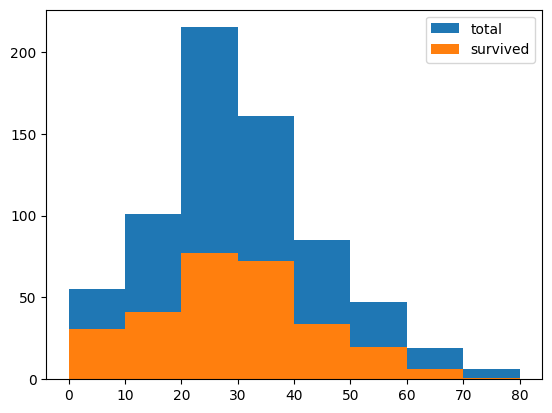

In [47]:
from matplotlib import pyplot as plt

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(ages, label="total", bins=age_bins)
plt.hist(survived_ages, label="survived", bins=age_bins)
plt.legend()

In [55]:
my_dict.values()

dict_values([[34.54, 34.345, 34.761], [34.541, 34.748, 34.482]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1179f3d60>,
 'caps': [<matplotlib.lines.Line2D at 0x117a242e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1179f3ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x117a24820>,
 'fliers': [<matplotlib.lines.Line2D at 0x117a24ac0>,
 'means': []}

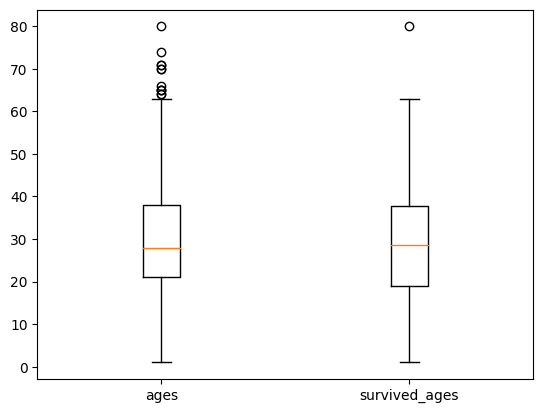

In [43]:
plt.boxplot([ages, survived_ages], labels=["ages", "survived_ages"])

### 5. 다 하셨다면 자유롭게 데이터를 만져보면서 생존율에 결정적인 영향을 미치는 요소가 무엇인지 찾아보세요. 